### Imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid", context="notebook")

### Atividade


1.  - Gere um sinal ($x(t)$) composto pelo somatório de duas senoides de forma a contemplar pelo menos 3 períodos completos da senoide de menor frequência;
    - Plote esse sinal com a base de tempo correspondente.

2.  - Simule o processo de conversão do sinal analógico para um sinal discreto no tempo ($x[n]$) e quantizado em amplitude ($x_q[n]$) com 10 bits;
    - Realize a discretização no tempo respeitando o limite de Nyquist. Plote os sinais após a discretização no tempo e após a quantização.
    - Estime o máximo erro de quantização.

3.  - Recupere o sinal analógico a partir do sinal quantizado em amplitude e discreto no tempo.
    - Compare o sinal original $x(t)$ com esse sinal recuperado plotando-os de forma sobreposta.


(a) Uma frequência de amostragem que não respeita o limite de Nyquist

(b) Que a quantização em amplitude é realizada com 6 bits


### Definição dos sinais


$$ s(t) = A \cdot \sin(2\pi \cdot f \cdot t) $$


In [3]:
A1, f1 = 20, 4  # Primeiro sinal
A2, f2 = 20, 8  # Segundo sinal

In [4]:
T1 = 1 / f1

In [5]:
fs_continuous = 500
ts_continuous = 1 / fs_continuous
t = np.arange(0, 3 * T1, ts_continuous)
t[0], t[-1], (t[1] - t[0], 1 / (t[1] - t[0]))

(0.0, 0.748, (0.002, 500.0))

In [6]:
arg1 = 2 * np.pi * f1
arg2 = 2 * np.pi * f2

$$ x(t) = A_1 \cdot \sin(2\pi \cdot f_1 \cdot t) + A_2 \cdot \sin(2\pi \cdot f_2 \cdot t) $$


In [7]:
s1 = A1 * np.sin(arg1 * t)
s2 = A2 * np.sin(arg2 * t)
x_t = s1 + s2

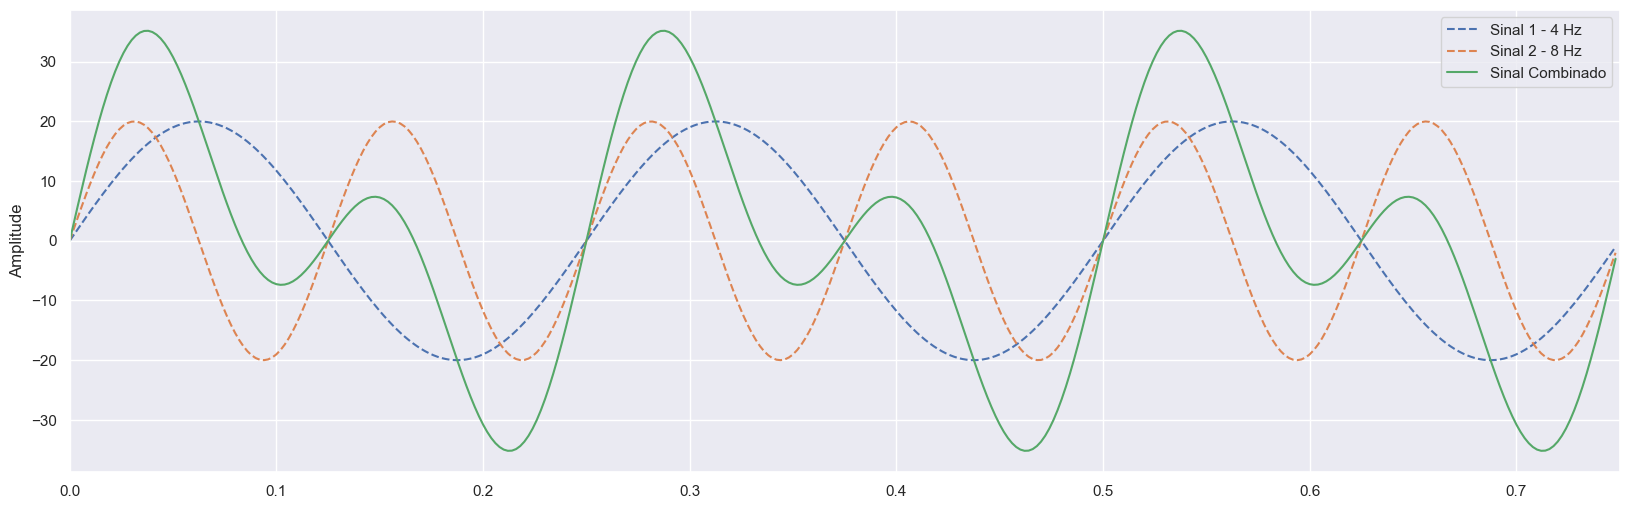

In [8]:
plt.figure(figsize=(20, 6))
plt.plot(t, s1, label="Sinal 1 - 4 Hz", linestyle="--")
plt.plot(t, s2, label="Sinal 2 - 8 Hz", linestyle="--")
plt.plot(
    t,
    x_t,
    label="Sinal Combinado",
)
plt.ylabel("Amplitude")
plt.legend()
plt.grid("on")
plt.xlim(0, 3 * T1)
plt.show()

### Conversão Analógico Digital


#### Amostragem


O sinal de maior frequência é o $s_2$ com $\text{8 Hz}$


In [9]:
fs_amostragem = 24
ts_amostragem = 1 / fs_amostragem

In [10]:
intervalo_amostra = int(fs_continuous / fs_amostragem)

In [11]:
x_n = x_t[::intervalo_amostra]
n = t[::intervalo_amostra]

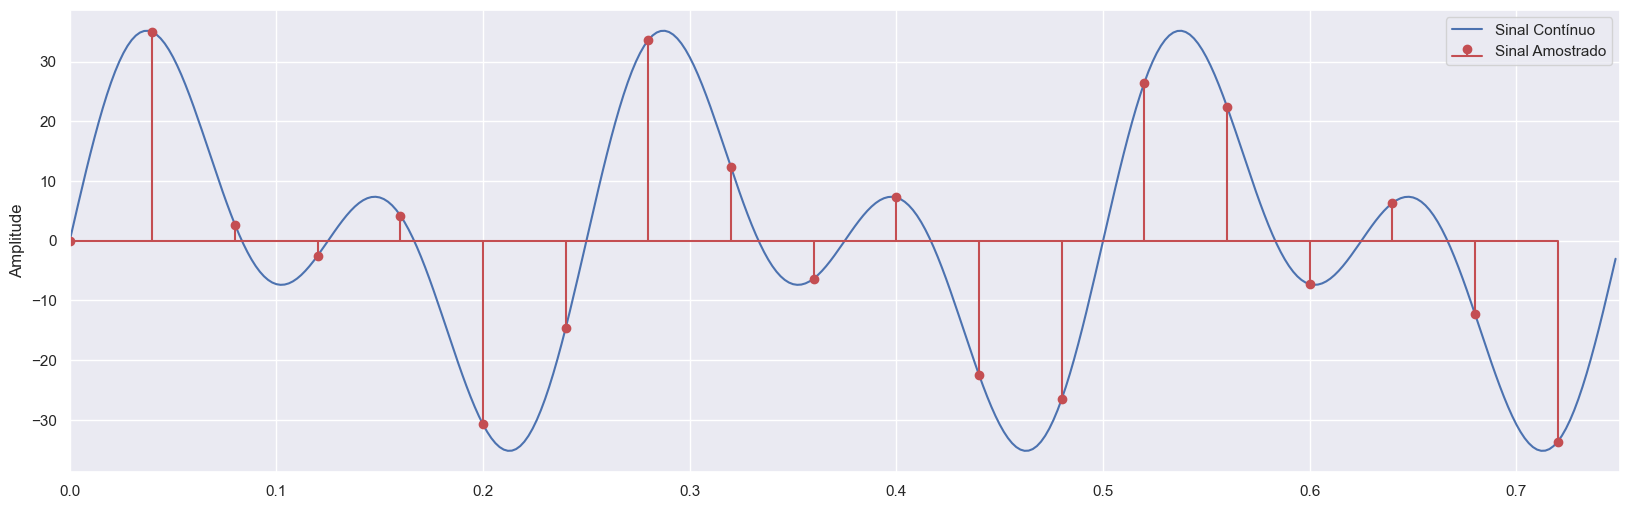

In [12]:
plt.figure(figsize=(20, 6))
plt.plot(t, x_t, label="Sinal Contínuo")
plt.stem(n, x_n, "ro", label="Sinal Amostrado")
plt.xlim(0, 3 * T1)
plt.ylabel("Amplitude")
plt.legend()
plt.grid("on")
plt.show()

In [13]:
bits = 10

#### Quantização


Fundo de escala: $X_m $

Faixa de Excursão: $2 \cdot X_m $


In [14]:
faixa_excursao = x_n.max() - x_n.min()
print(faixa_excursao)

68.6345762464999


Menor nível de quantização: $\Delta = \frac{2X_m}{2^{B+1}} = \frac{X_m}{2^{B}}$


In [15]:
delta = faixa_excursao / ((2 ** (bits)))
delta

0.06702595336572256

In [16]:
faixa_quantizacao = np.arange(x_n.min(), x_n.max(), faixa_excursao / (2 ** (bits)))
faixa_quantizacao[1] - faixa_quantizacao[0]  # Aprox. delta

0.06702595336572159

Mid-Tread: $Q(x) = \Delta \cdot \text{round}(\frac{x-\text{s}_{min}}{\Delta}) + \text{s}_{min} $


In [17]:
def mid_tread(value, delta, min_value):
    return round((value - min_value) / delta) * delta + min_value

In [18]:
x_n_q = [mid_tread(v, delta, x_n.min()) for v in x_n]  # X Amostrado e quantizado

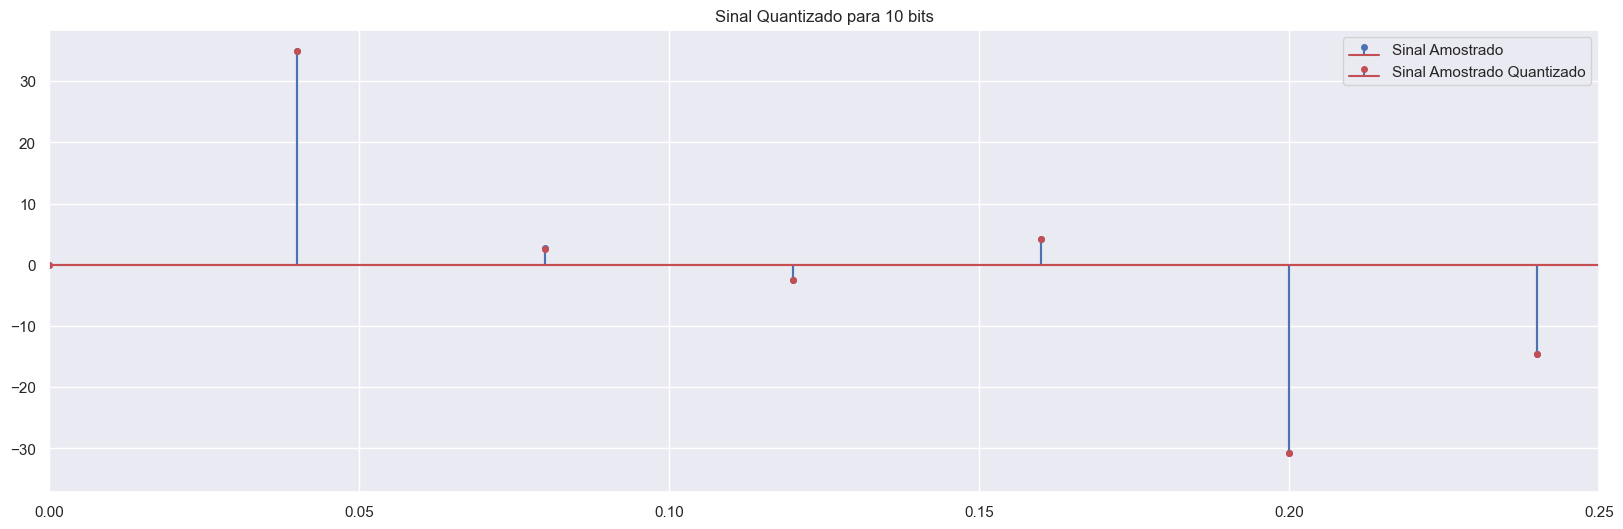

In [19]:
fig, ax = plt.subplots(figsize=(20, 6))
markerline, stemline, baseline = ax.stem(n, x_n, label="Sinal Amostrado")
plt.setp(markerline, markersize=4)

markerline_quantized, stemline_quantized, baseline_quantized = ax.stem(
    n, x_n_q, label="Sinal Amostrado Quantizado", markerfmt="ro"
)
plt.setp(markerline_quantized, markersize=4)

ax.set_title(f"Sinal Quantizado para {bits} bits")
ax.set_xlim(0, 0.25)
plt.legend()
plt.grid("on")
plt.show()

### Conversão Digital Analógico


#### Completar o sinal


In [20]:
x_n_q_full = np.zeros(len(x_t))
x_n_q_full[::intervalo_amostra] = x_n_q

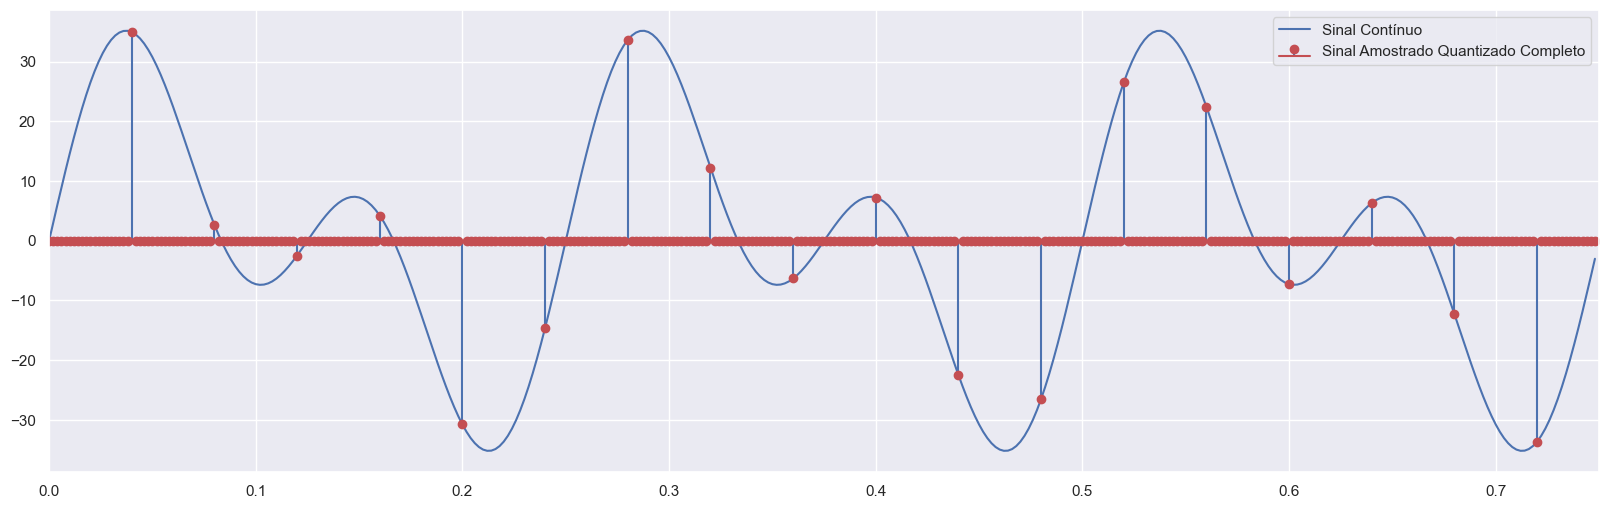

In [21]:
plt.figure(figsize=(20, 6))
plt.plot(t, x_t, label="Sinal Contínuo")
plt.stem(t, x_n_q_full, label="Sinal Amostrado Quantizado Completo", markerfmt="ro")
plt.xlim(0, 3 * T1)
plt.grid("on")
plt.legend()
plt.show()

#### Transformada de Fourier


In [22]:
x_f_q = np.fft.fft(x_n_q_full)
freqs = np.fft.fftfreq(len(x_n_q_full), d=ts_continuous)

In [23]:
def plot_fft(x_f, freqs, label="FFT do Sinal", axis=None, c=None):
    signal_shifted = np.fft.fftshift(x_f)
    freqs_shifted = np.fft.fftshift(freqs)
    axis.plot(freqs_shifted, np.abs(signal_shifted), label=label, color=c)

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jonhb\AppData\Local\Temp\ipykernel_57452\2461632887.py:2: SyntaxWarning: invalid escape sequence '\o'
  plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")


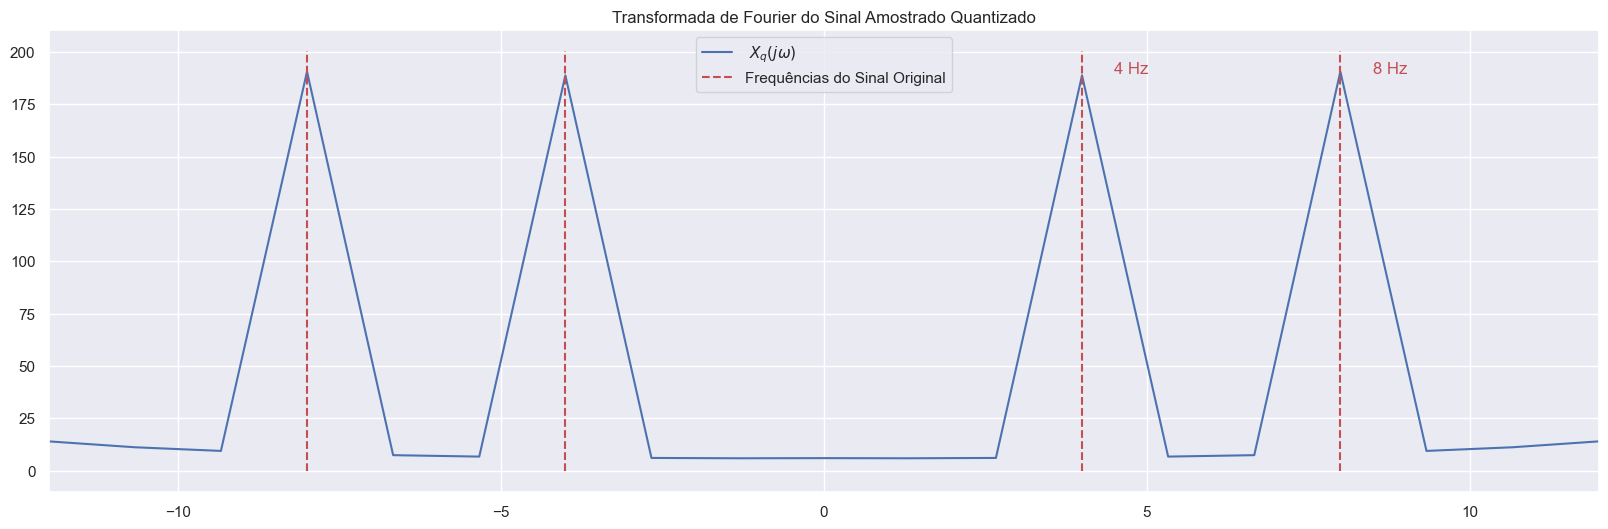

In [24]:
fig, ax = plt.subplots(figsize=(20, 6))
plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")
ax.set_xlim(-fs_amostragem / 2, fs_amostragem / 2)
ax.vlines(
    [-f1, f1, -f2, f2],
    ymin=0,
    ymax=ax.get_ylim()[1],
    color="r",
    linestyle="--",
    label="Frequências do Sinal Original",
)
for frequencia in [f1, f2]:
    ax.text(frequencia + 0.5, ax.get_ylim()[1] * 0.9, f"{frequencia} Hz", color="r")
ax.set_title("Transformada de Fourier do Sinal Amostrado Quantizado")
ax.legend()
plt.grid("on")
plt.show()

#### Filtro


In [25]:
cut_frequency = fs_amostragem / 2
cut_frequency

12.0

In [26]:
filtro_passa_baixas = np.abs(freqs) <= cut_frequency

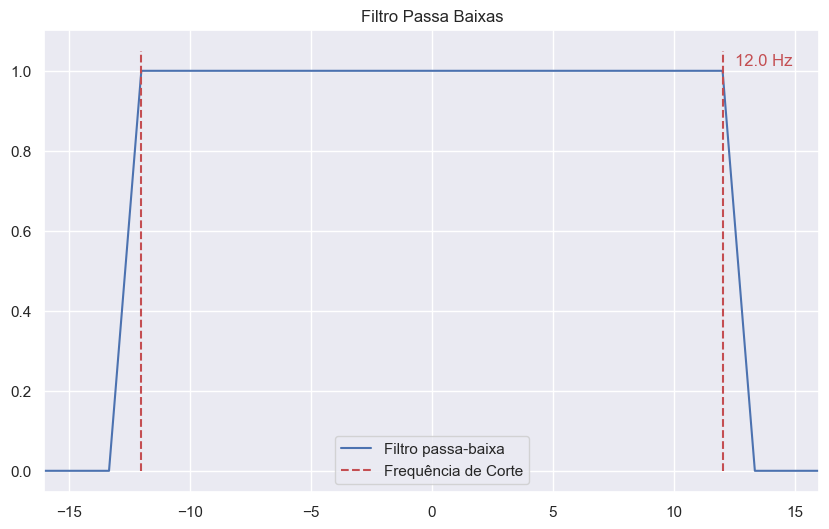

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_fft(filtro_passa_baixas, freqs, axis=ax, label="Filtro passa-baixa")
ax.set_xlim(-fs_amostragem / 1.5, fs_amostragem / 1.5)
ax.set_title("Filtro Passa Baixas")
plt.vlines(
    [-cut_frequency, cut_frequency],
    ymin=0,
    ymax=ax.get_ylim()[1],
    color="r",
    linestyle="--",
    label="Frequência de Corte",
)
ax.text(cut_frequency + 0.5, ax.get_ylim()[1] * 0.92, f"{cut_frequency} Hz", color="r")
ax.legend()
plt.grid("on")
plt.show()

#### Filtragem


A FFT de um gate no domínio da frequência corresponde a uma função $\text{sinc}$ no tempo.

$$\mathcal{F}^{-1}\{\text{rect}(j\omega)\} = \text{sinc}(t)$$

Sabe-se também que a convolução no tempo corresponde à multiplicação no domínio frequência.

$$\mathcal{F}\{x(t) * h(t)\} = X(j\omega) \cdot H(j\omega)$$

Portanto, ao multiplicar nosso sinal $X_q(j\omega)$ pelo filtro $F(j\omega)$ teremos, no domínio do tempo, a convolução do sinal quantizado e amostrado com uma $\text{sinc}$, o que irá recuperar nosso sinal original e interpolar as amostras.

$$x_{rec}(t) = \mathcal{F}^{-1}\{X_q(j\omega) \cdot F(j\omega)\} = x_q[n] * \text{sinc}(t)$$


<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jonhb\AppData\Local\Temp\ipykernel_57452\4134277240.py:3: SyntaxWarning: invalid escape sequence '\o'
  plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")


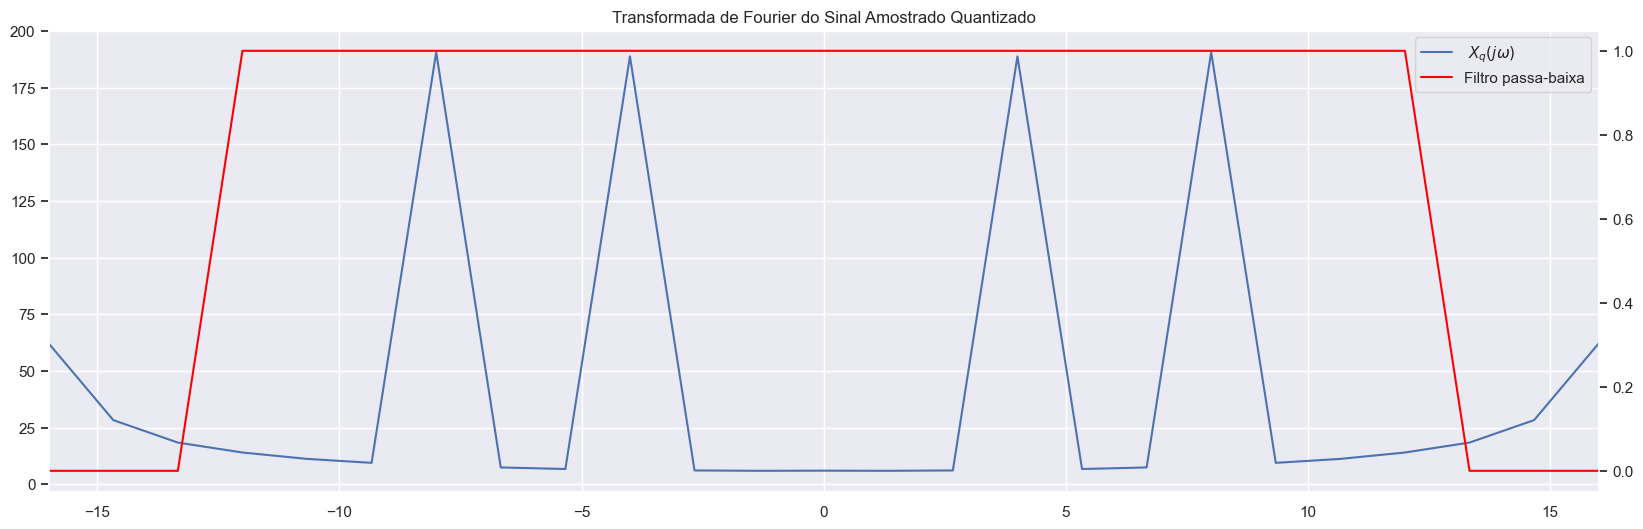

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))
ax2 = ax.twinx()
plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")
plot_fft(filtro_passa_baixas, freqs, axis=ax2, label="Filtro passa-baixa", c="red")
ax.set_title("Transformada de Fourier do Sinal Amostrado Quantizado")
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.set_xlim(-fs_amostragem / 1.5, fs_amostragem / 1.5)
ax.legend(lines1 + lines2, labels1 + labels2)
ax.grid(True)
ax2.grid(False)
plt.show()

In [29]:
x_f_q_filtered = x_f_q * filtro_passa_baixas

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jonhb\AppData\Local\Temp\ipykernel_57452\1851723287.py:2: SyntaxWarning: invalid escape sequence '\o'
  plot_fft(x_f_q_filtered, freqs, axis=ax, label=" $ X_{qf}(j\omega)$")


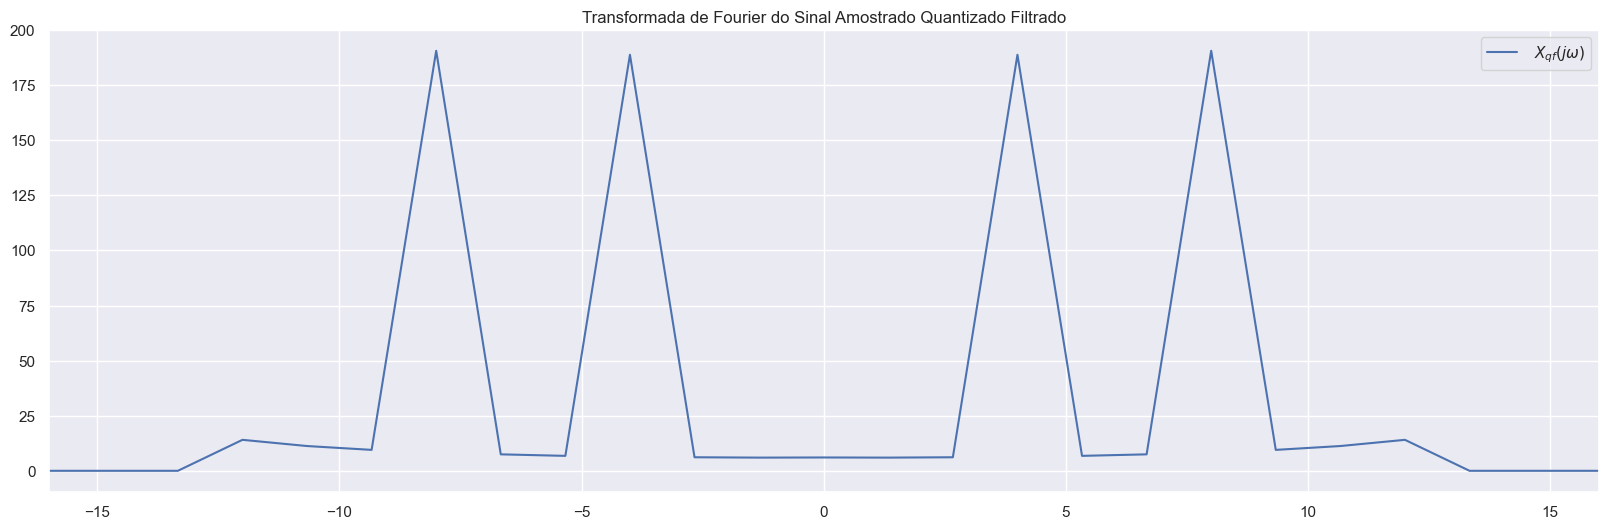

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))
plot_fft(x_f_q_filtered, freqs, axis=ax, label=" $ X_{qf}(j\omega)$")

ax.set_title("Transformada de Fourier do Sinal Amostrado Quantizado Filtrado")
ax.legend()
ax.set_xlim(-fs_amostragem / 1.5, fs_amostragem / 1.5)
ax.grid(True)
plt.show()

#### Transformada Inversa de Fourier


In [31]:
x_t_q_rec = np.fft.ifft(x_f_q_filtered) * A1

### Análise


c:\Users\jonhb\miniconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jonhb\miniconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


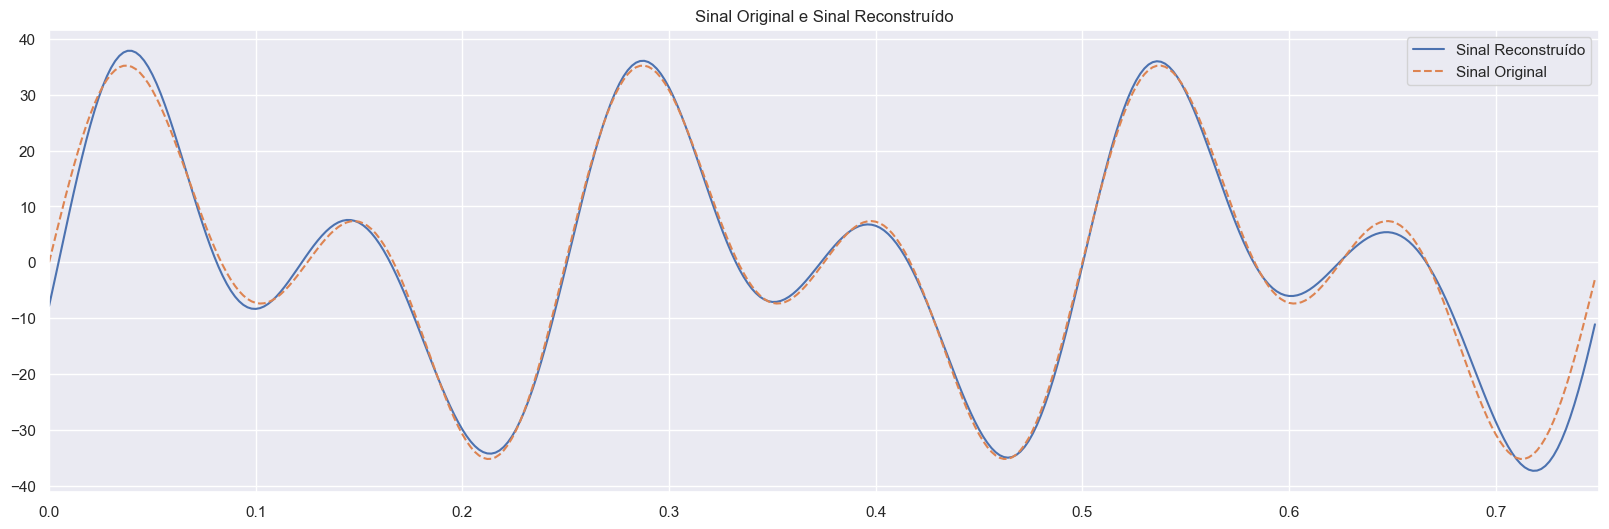

In [32]:
plt.figure(figsize=(20, 6))
plt.title("Sinal Original e Sinal Reconstruído")
plt.plot(t, x_t_q_rec, linestyle="-", label="Sinal Reconstruído")
plt.plot(t, x_t, linestyle="--", label="Sinal Original")
plt.legend()
plt.xlim(0, 3 * T1)
plt.grid(True)
plt.show()

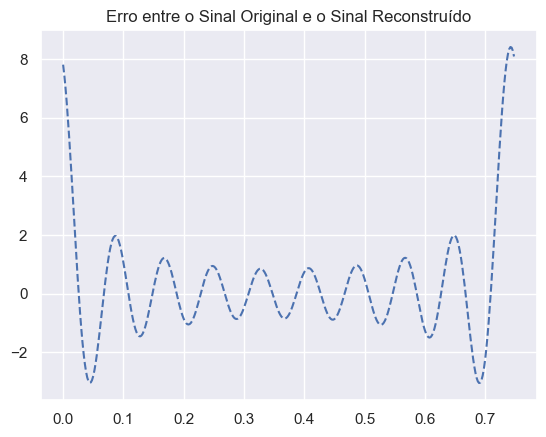

In [33]:
plt.title("Erro entre o Sinal Original e o Sinal Reconstruído")
plt.plot(t, x_t - x_t_q_rec, linestyle="--")

Para esse resultado os parâmetros escolhidos foram:

- Frequência do primeiro sinal: 4 Hz
- Frequência do segundo sinal: 8 Hz
- Frequência de amostragem: 24 Hz
- Número de bits para quantização: 10 bits

Em função de uma taxa amostragem maior que 16 Hz e uma quantidade razoável de bits para quantização, pode-se observar que o sinal reconstruído é bem similar ao original. \
Há uma sutíl diferença de amplitude, que ocorreu em função da quantização.


### (a) Frequência abaixo de Nyquist


In [34]:
fs_amostragem = 10
ts_amostragem = 1 / fs_amostragem
intervalo_amostra = int(fs_continuous / fs_amostragem)
x_n = x_t[::intervalo_amostra]
n = t[::intervalo_amostra]

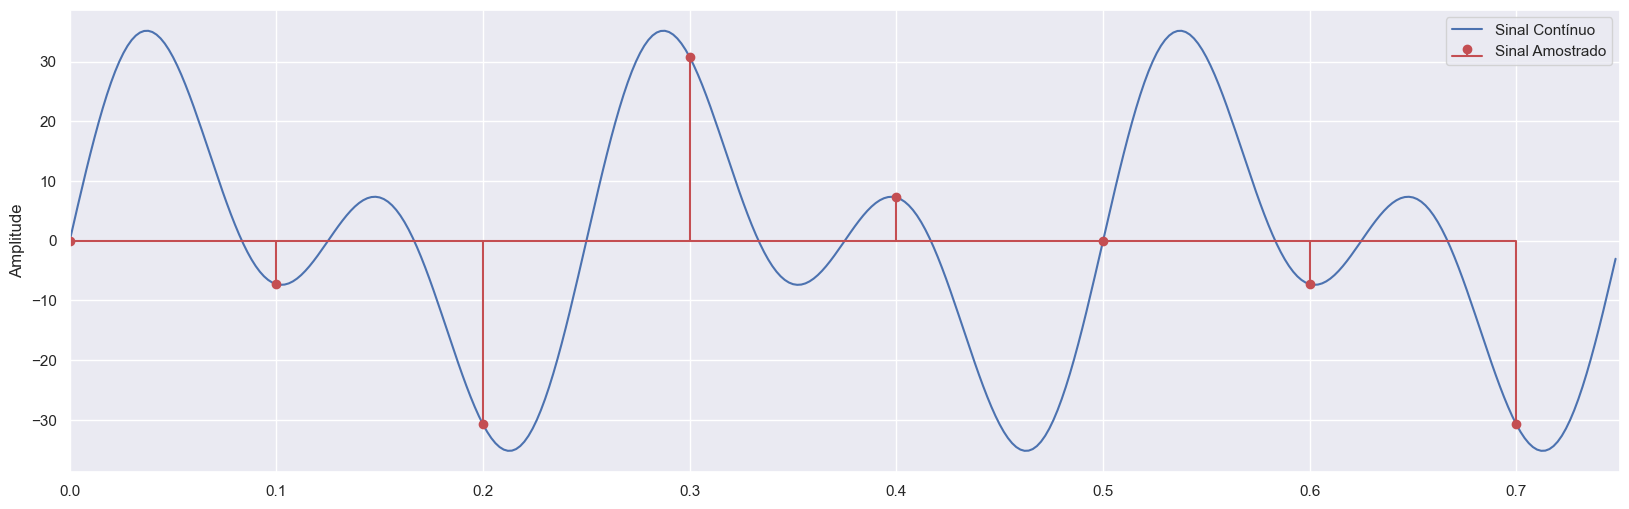

In [35]:
plt.figure(figsize=(20, 6))
plt.plot(t, x_t, label="Sinal Contínuo")
plt.stem(n, x_n, "ro", label="Sinal Amostrado")
plt.xlim(0, 3 * T1)
plt.ylabel("Amplitude")
plt.legend()
plt.grid("on")
plt.show()

In [36]:
bits = 10

In [37]:
faixa_excursao = x_n.max() - x_n.min()
delta = faixa_excursao / ((2 ** (bits)))
x_n_q = [mid_tread(v, delta, x_n.min()) for v in x_n]  # X Amostrado e quantizado

In [38]:
x_n_q_full = np.zeros(len(x_t))
x_n_q_full[::intervalo_amostra] = x_n_q

#### Transformada de Fourier


In [39]:
x_f_q = np.fft.fft(x_n_q_full)
freqs = np.fft.fftfreq(len(x_n_q_full), d=ts_continuous)

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jonhb\AppData\Local\Temp\ipykernel_57452\1592648611.py:2: SyntaxWarning: invalid escape sequence '\o'
  plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")


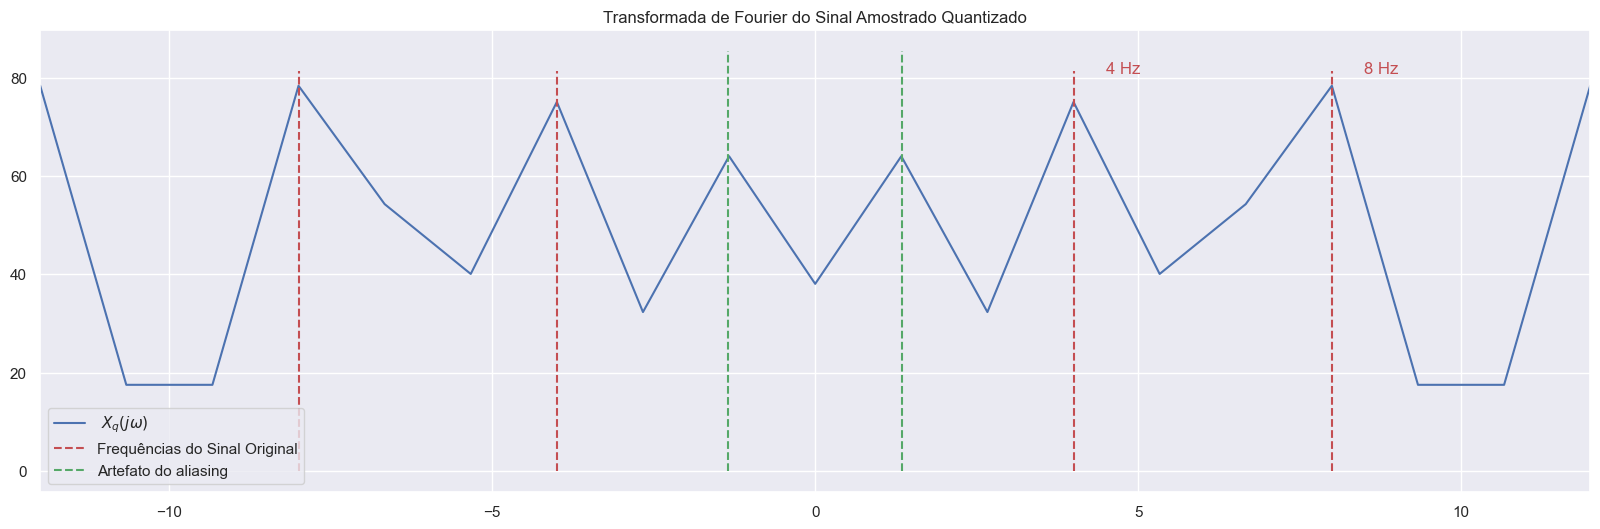

In [40]:
fig, ax = plt.subplots(figsize=(20, 6))
plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")

ax.vlines(
    [
        -f1,
        f1,
        -f2,
        f2,
    ],
    ymin=0,
    ymax=ax.get_ylim()[1],
    color="r",
    linestyle="--",
    label="Frequências do Sinal Original",
)
ax.vlines(
    [-1.35, 1.35],
    ymin=0,
    ymax=ax.get_ylim()[1],
    color="g",
    linestyle="--",
    label="Artefato do aliasing",
)
for frequencia in [f1, f2]:
    ax.text(frequencia + 0.5, ax.get_ylim()[1] * 0.9, f"{frequencia} Hz", color="r")


ax.set_title("Transformada de Fourier do Sinal Amostrado Quantizado")
ax.legend()
plt.grid("on")
ax.set_xlim(-12, 12)
plt.show()

Podemos observar que surgiram artefatos de frequência, por volta dos 1.35 Hz, em função do aliasing.


#### Filtro


In [41]:
cut_frequency = 10
cut_frequency

10

In [42]:
filtro_passa_baixas = np.abs(freqs) <= cut_frequency

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jonhb\AppData\Local\Temp\ipykernel_57452\253879511.py:3: SyntaxWarning: invalid escape sequence '\o'
  plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")


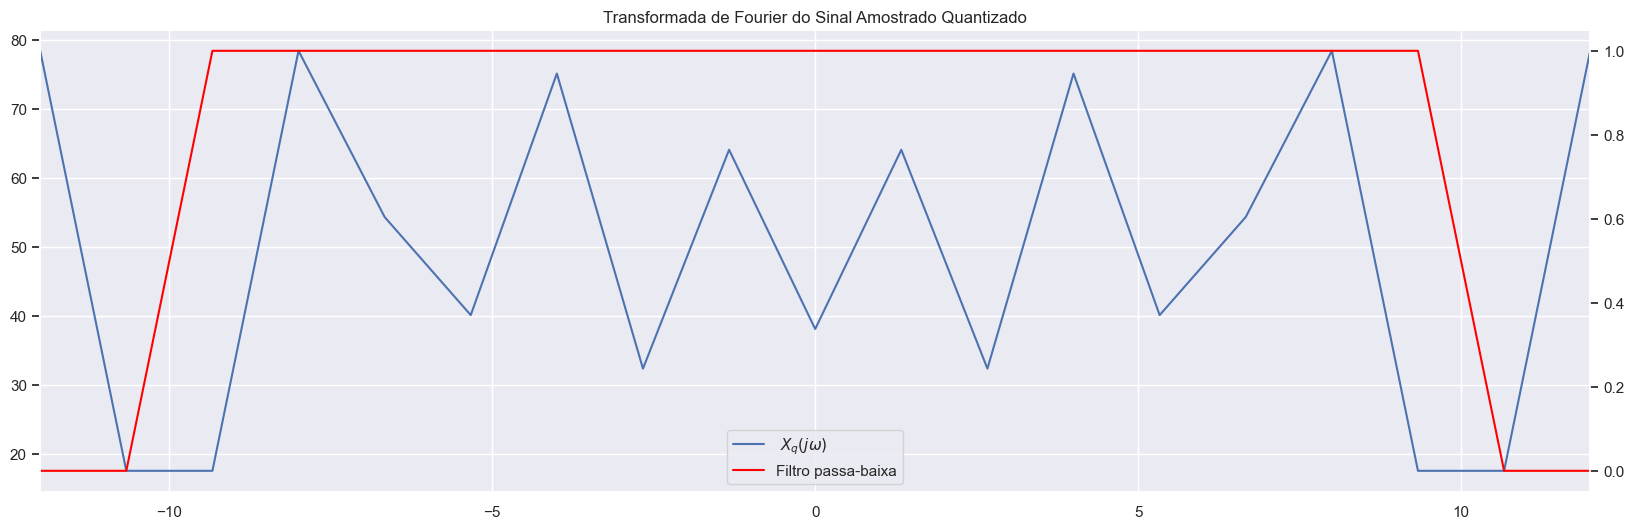

In [43]:
fig, ax = plt.subplots(figsize=(20, 6))
ax2 = ax.twinx()
plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")
plot_fft(filtro_passa_baixas, freqs, axis=ax2, label="Filtro passa-baixa", c="red")
ax.set_title("Transformada de Fourier do Sinal Amostrado Quantizado")
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.set_xlim(-12, 12)
ax.legend(lines1 + lines2, labels1 + labels2)
ax.grid(True)
ax2.grid(False)
plt.show()

In [44]:
x_f_q_filtered = x_f_q * filtro_passa_baixas

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jonhb\AppData\Local\Temp\ipykernel_57452\2425629494.py:2: SyntaxWarning: invalid escape sequence '\o'
  plot_fft(x_f_q_filtered, freqs, axis=ax, label=" $ X_{qf}(j\omega)$")


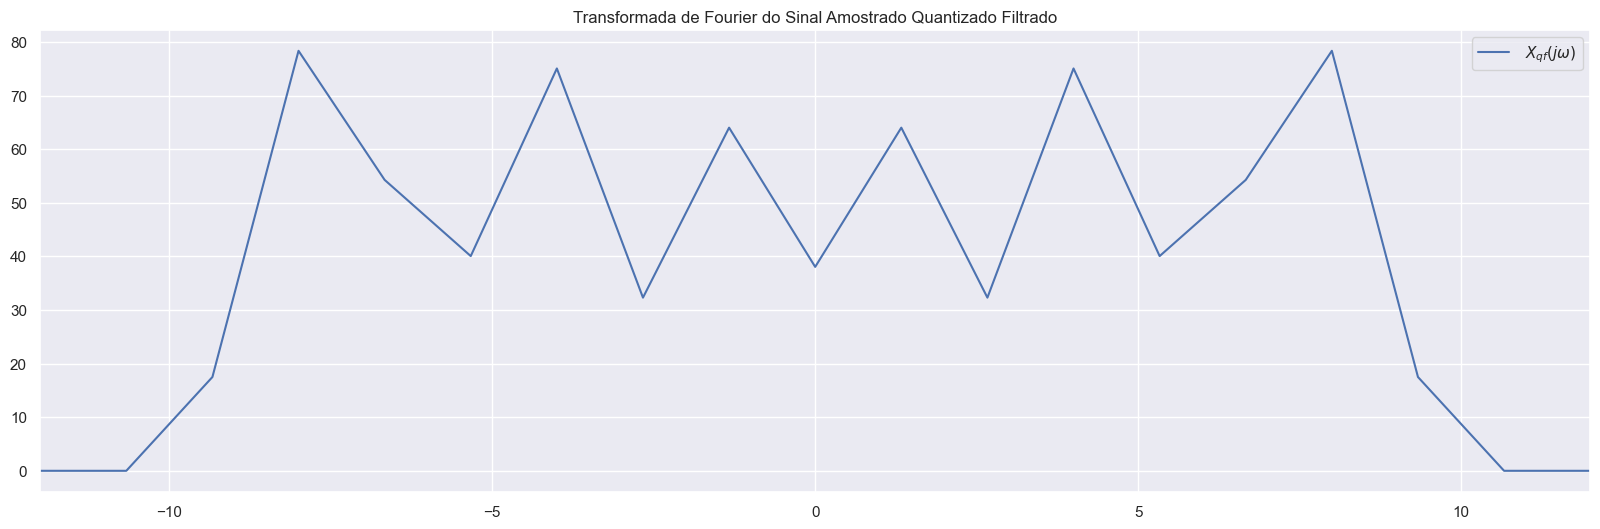

In [45]:
fig, ax = plt.subplots(figsize=(20, 6))
plot_fft(x_f_q_filtered, freqs, axis=ax, label=" $ X_{qf}(j\omega)$")

ax.set_title("Transformada de Fourier do Sinal Amostrado Quantizado Filtrado")
ax.legend()
ax.set_xlim(-12, 12)
ax.grid(True)
plt.show()

#### Transformada Inversa de Fourier


In [46]:
x_t_q_rec = np.fft.ifft(x_f_q_filtered)

#### Análise


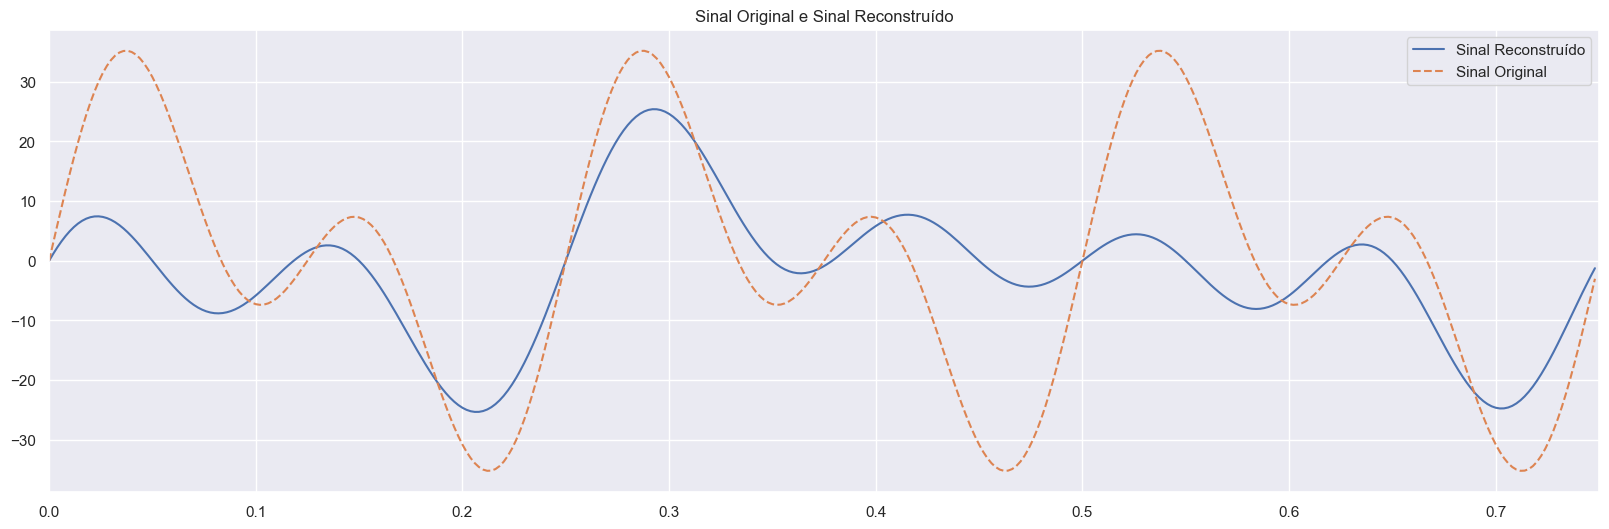

In [47]:
plt.figure(figsize=(20, 6))
plt.title("Sinal Original e Sinal Reconstruído")
plt.plot(t, x_t_q_rec * 20, linestyle="-", label="Sinal Reconstruído")
plt.plot(t, x_t, linestyle="--", label="Sinal Original")
plt.legend()
plt.xlim(0, 3 * T1)
plt.grid(True)
plt.show()

Para esse resultado os parâmetros escolhidos foram:

- Frequência do primeiro sinal: 4 Hz
- Frequência do segundo sinal: 8 Hz
- Frequência de amostragem: 10 Hz
- Número de bits para quantização: 10 bits

Em função de uma taxa amostragem abaixo de 16 Hz, o sinal foi afetado por aliasing, gerando uma deformação na forma de onda original.


### (b) Que a quantização em amplitude é realizada com 6 bits


In [48]:
fs_amostragem = 24
ts_amostragem = 1 / fs_amostragem
intervalo_amostra = int(fs_continuous / fs_amostragem)
x_n = x_t[::intervalo_amostra]
n = t[::intervalo_amostra]

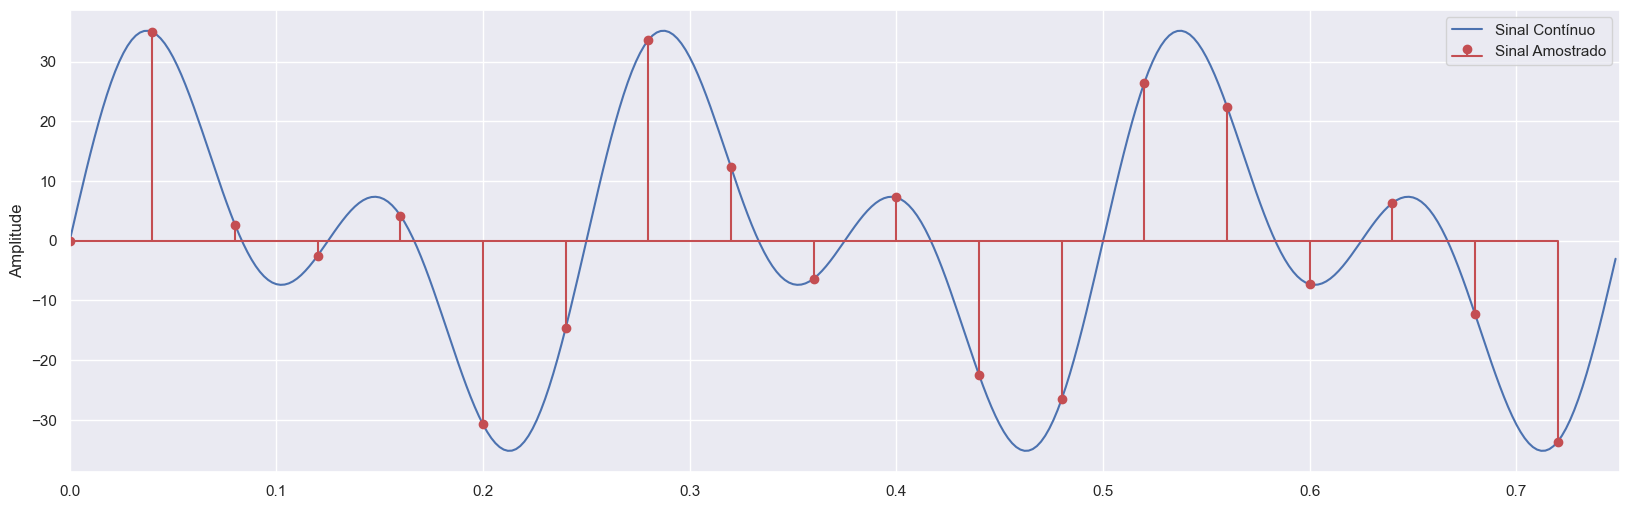

In [49]:
plt.figure(figsize=(20, 6))
plt.plot(t, x_t, label="Sinal Contínuo")
plt.stem(n, x_n, "ro", label="Sinal Amostrado")
plt.xlim(0, 3 * T1)
plt.ylabel("Amplitude")
plt.legend()
plt.grid("on")
plt.show()

In [50]:
bits = 6

In [51]:
faixa_excursao = x_n.max() - x_n.min()
delta = faixa_excursao / ((2 ** (bits)))
x_n_q = [mid_tread(v, delta, x_n.min()) for v in x_n]  # X Amostrado e quantizado
delta

1.072415253851561

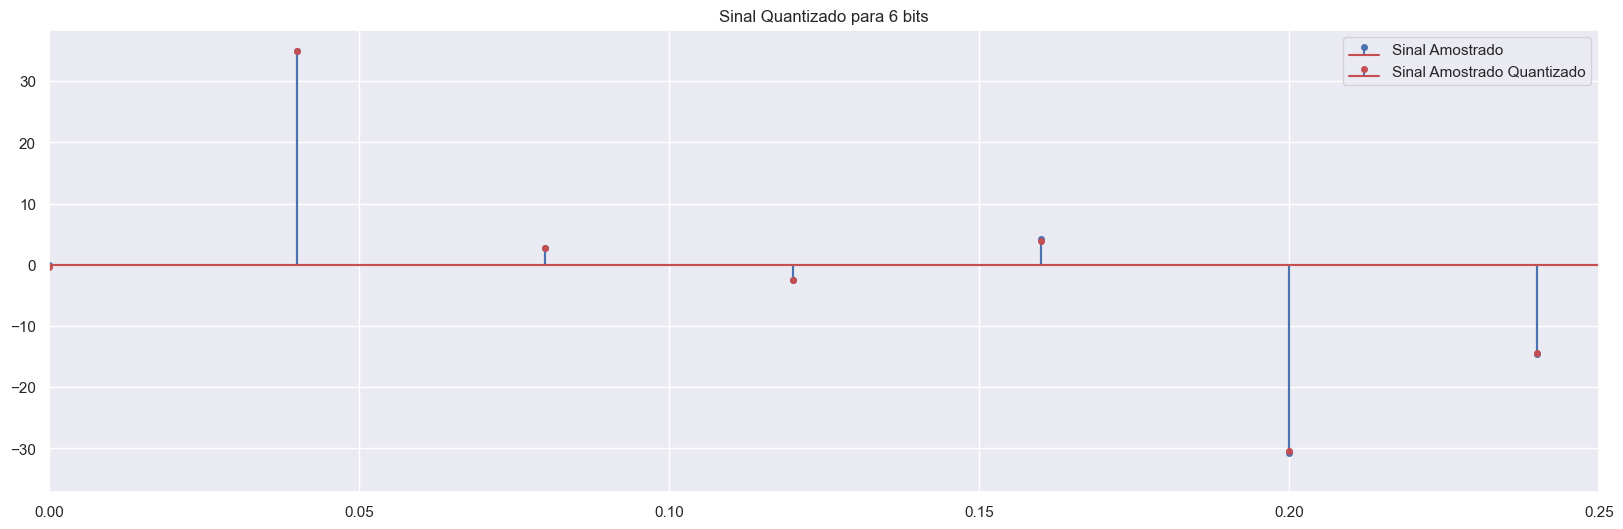

In [52]:
fig, ax = plt.subplots(figsize=(20, 6))
markerline, stemline, baseline = ax.stem(n, x_n, label="Sinal Amostrado")
plt.setp(markerline, markersize=4)

markerline_quantized, stemline_quantized, baseline_quantized = ax.stem(
    n, x_n_q, label="Sinal Amostrado Quantizado", markerfmt="ro"
)
plt.setp(markerline_quantized, markersize=4)

ax.set_title(f"Sinal Quantizado para {bits} bits")
ax.set_xlim(0, 0.25)
plt.legend()
plt.grid("on")
plt.show()

In [53]:
x_n_q_full = np.zeros(len(x_t))
x_n_q_full[::intervalo_amostra] = x_n_q

#### Transformada de Fourier


In [54]:
x_f_q = np.fft.fft(x_n_q_full)
freqs = np.fft.fftfreq(len(x_n_q_full), d=ts_continuous)

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jonhb\AppData\Local\Temp\ipykernel_57452\1280916299.py:2: SyntaxWarning: invalid escape sequence '\o'
  plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")


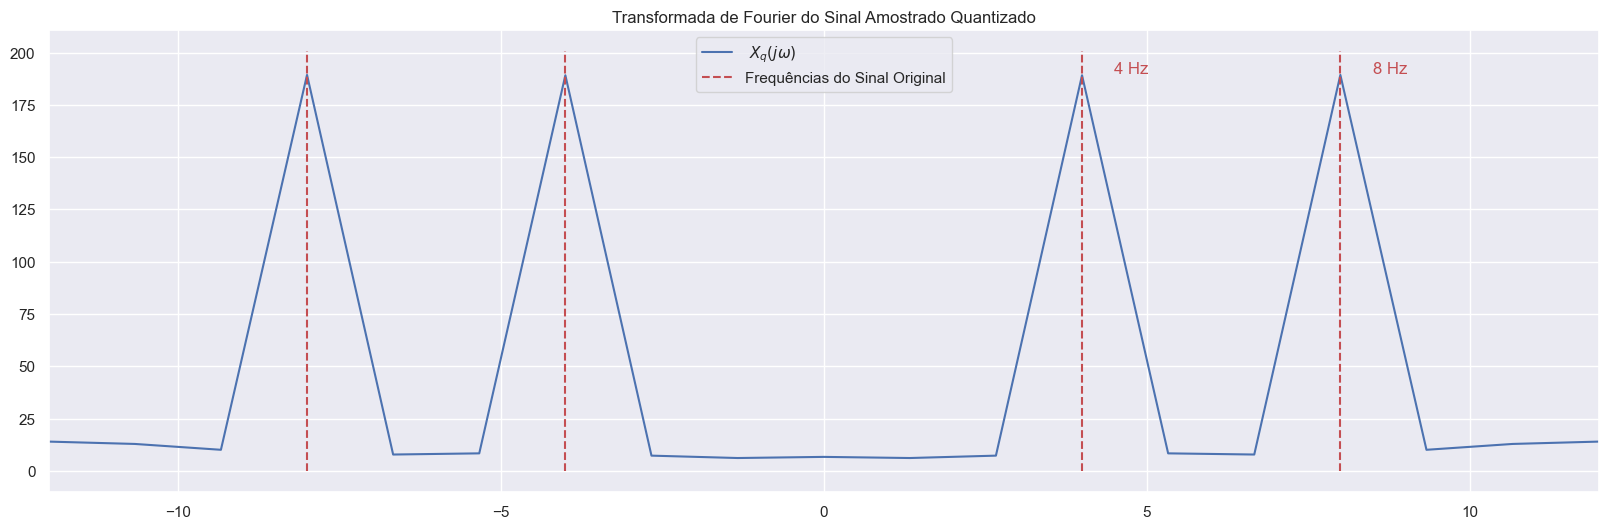

In [55]:
fig, ax = plt.subplots(figsize=(20, 6))
plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")

ax.vlines(
    [
        -f1,
        f1,
        -f2,
        f2,
    ],
    ymin=0,
    ymax=ax.get_ylim()[1],
    color="r",
    linestyle="--",
    label="Frequências do Sinal Original",
)

for frequencia in [f1, f2]:
    ax.text(frequencia + 0.5, ax.get_ylim()[1] * 0.9, f"{frequencia} Hz", color="r")


ax.set_title("Transformada de Fourier do Sinal Amostrado Quantizado")
ax.legend()
plt.grid("on")
ax.set_xlim(-12, 12)
plt.show()

Podemos observar que surgiram artefatos de frequência, por volta dos 1.35 Hz, em função do aliasing.


#### Filtro


In [56]:
cut_frequency = 10
cut_frequency

10

In [57]:
filtro_passa_baixas = np.abs(freqs) <= cut_frequency

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jonhb\AppData\Local\Temp\ipykernel_57452\253879511.py:3: SyntaxWarning: invalid escape sequence '\o'
  plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")


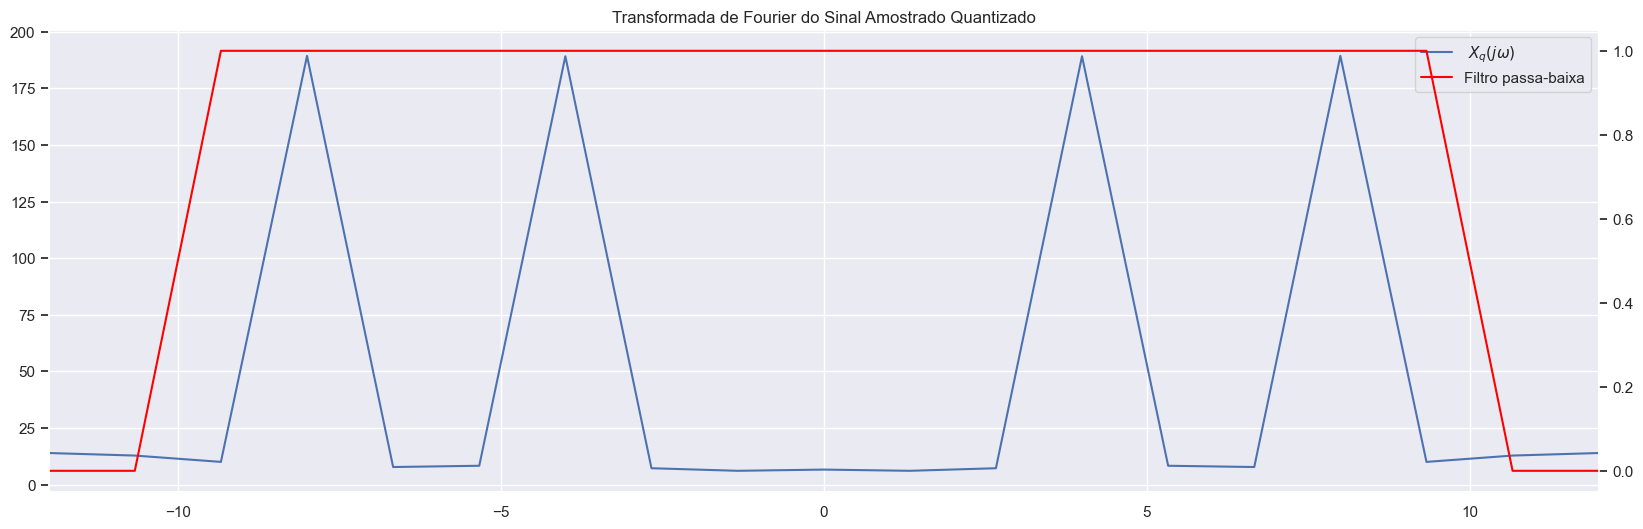

In [58]:
fig, ax = plt.subplots(figsize=(20, 6))
ax2 = ax.twinx()
plot_fft(x_f_q, freqs, axis=ax, label=" $ X_q(j\omega)$")
plot_fft(filtro_passa_baixas, freqs, axis=ax2, label="Filtro passa-baixa", c="red")
ax.set_title("Transformada de Fourier do Sinal Amostrado Quantizado")
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.set_xlim(-12, 12)
ax.legend(lines1 + lines2, labels1 + labels2)
ax.grid(True)
ax2.grid(False)
plt.show()

In [59]:
x_f_q_filtered = x_f_q * filtro_passa_baixas

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jonhb\AppData\Local\Temp\ipykernel_57452\2425629494.py:2: SyntaxWarning: invalid escape sequence '\o'
  plot_fft(x_f_q_filtered, freqs, axis=ax, label=" $ X_{qf}(j\omega)$")


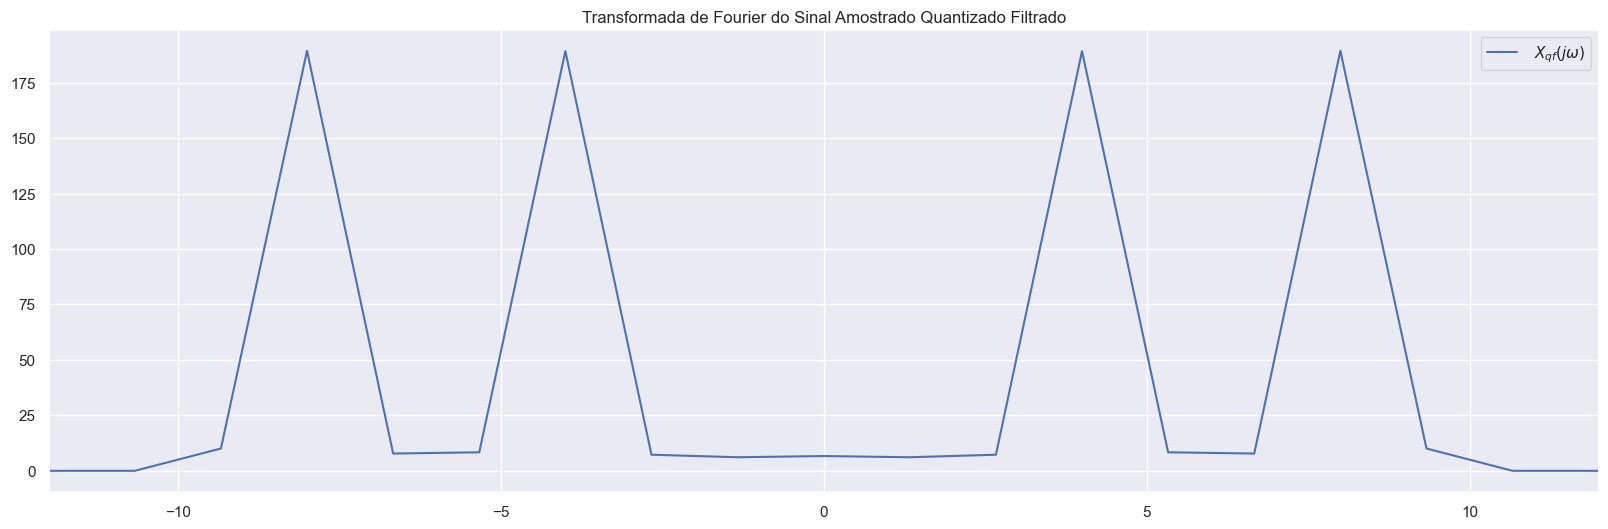

In [60]:
fig, ax = plt.subplots(figsize=(20, 6))
plot_fft(x_f_q_filtered, freqs, axis=ax, label=" $ X_{qf}(j\omega)$")

ax.set_title("Transformada de Fourier do Sinal Amostrado Quantizado Filtrado")
ax.legend()
ax.set_xlim(-12, 12)
ax.grid(True)
plt.show()

#### Transformada Inversa de Fourier


In [61]:
x_t_q_rec = np.fft.ifft(x_f_q_filtered) * A1

#### Análise


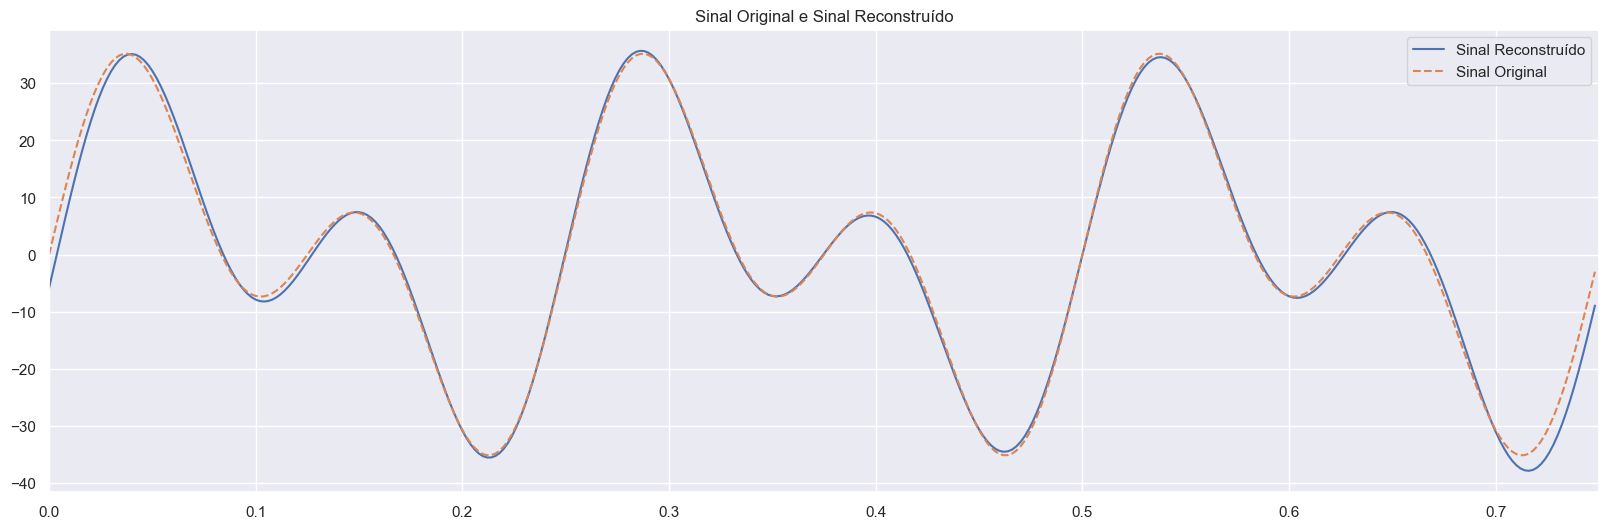

In [62]:
plt.figure(figsize=(20, 6))
plt.title("Sinal Original e Sinal Reconstruído")
plt.plot(t, x_t_q_rec, linestyle="-", label="Sinal Reconstruído")
plt.plot(t, x_t, linestyle="--", label="Sinal Original")
plt.legend()
plt.xlim(0, 3 * T1)
plt.grid(True)
plt.show()

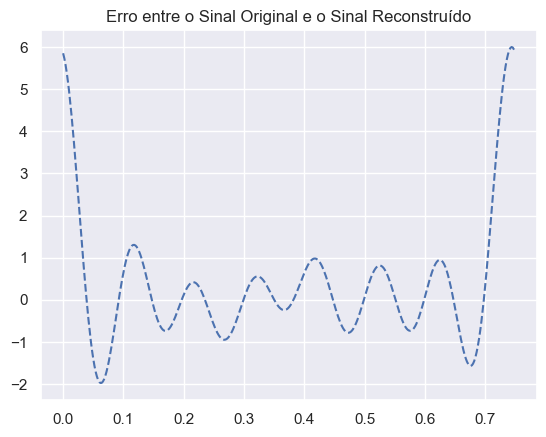

In [63]:
plt.title("Erro entre o Sinal Original e o Sinal Reconstruído")
plt.plot(t, x_t - x_t_q_rec, linestyle="--")

Para esse resultado os parâmetros escolhidos foram:

- Frequência do primeiro sinal: 4 Hz
- Frequência do segundo sinal: 8 Hz
- Frequência de amostragem: 24 Hz
- Número de bits para quantização: 6 bits

Para esse sinal, 6 bits de quantização gerou um resultado bem satisfatório.
